# Matplotlib and Data Visualization Tutorial

This notebook introduces plotting functionality in Python and basic data visualization principles. It was developed for the 2018 [KIPAC Computing Boot Camp](http://kipac.github.io/BootCamp/).

Author: [Ethan Nadler](https://github.com/eonadler/)

## Table of Contents:
* [Introduction](#first-bullet)
* [How to Make Nice Plots I: The Basics](#second-bullet)
* [How to Make Nice Plots II: Special Cases](#third-bullet)
* [Scatter Plots, Histograms, Bar Plots, Contour Plots](#fourth-bullet)
* [Colorschemes](#fifth-bullet)
* [Tips for Making Publication-Quality Plots](#sixth-bullet)

## Introduction <a class="anchor" id="first-bullet"></a>

[Matplotlib](https://matplotlib.org/) is an awesome plotting package. Hopefully this notebook gives you a sense of the possibilities it provides for data visualization, but the best way to get inspired is by searching around; for example, see [this gallery](https://matplotlib.org/gallery.html).

Let's get started!

In [1]:
import numpy as np

#With the inline command, plots display inline, directly below code cells in Jupyter notebooks
import matplotlib.pyplot as plt
import matplotlib.colors as colors
%matplotlib inline

In [2]:
#Make up some data
x = np.linspace(0,10,100)

#a, b, c = 5.*np.random.rand(4,1), np.random.rand(4,1), 0.05*np.random.rand(4,1)
a = np.array([[1.40818414], [0.50016125], [4.66211838], [1.36305024]])
b = np.array([[ 0.12923499], [0.88915178], [0.35243495], [0.93726091]])
c = np.array([[ 0.03126996], [0.02261377], [0.01267602], [0.0165339]])

y_lin = a + b*x
y_quad = a + b*x + c*x**2

First, let's make a simple plot of $x$ vs. $y_{\rm{lin}}$ (we will make this look presentable later):

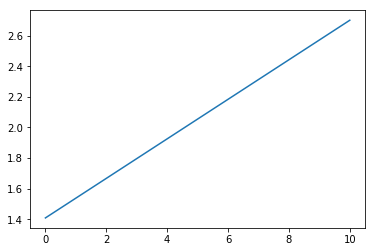

In [3]:
plt.plot(x, y_lin[0])
plt.show()

Multiple lines can be added to a plot by repeatedly calling plt.plot. Matplotlib will cycle through its default color scheme in this case. We'll go over how to view and change the default colorscheme below.

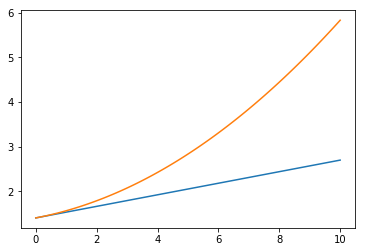

In [4]:
plt.plot(x, y_lin[0])
plt.plot(x, y_quad[0])
plt.show()

Subplotting allow you to create multiple plots simultaneously. Here are a few examples:

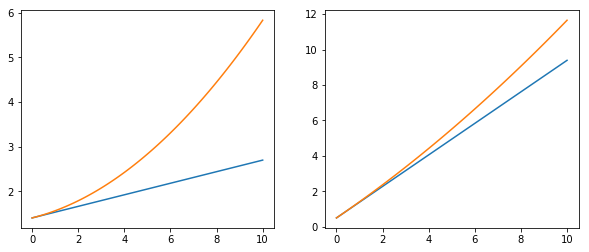

In [5]:
fig = plt.figure(figsize=(10,4))

ax1 = fig.add_subplot(121) #subplot argument: (rows/columns/which subplot)
ax1.plot(x, y_lin[0])
ax1.plot(x, y_quad[0])

ax2 = fig.add_subplot(122)
ax2.plot(x, y_lin[1])
ax2.plot(x, y_quad[1])

plt.show()

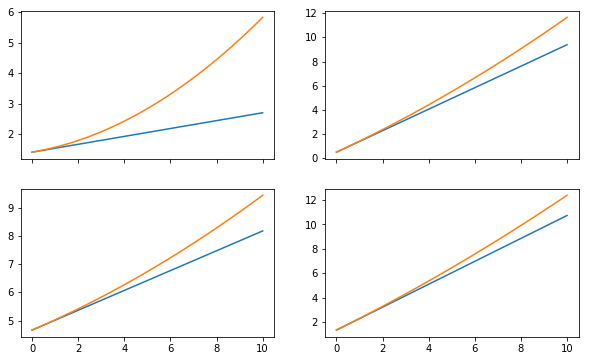

In [6]:
f, ax = plt.subplots(2,2,sharex='col',sharey='none',figsize=(10,6)) #2 rows x 2 columns

ax[0,0].plot(x, y_lin[0])
ax[0,0].plot(x, y_quad[0])

ax[0,1].plot(x, y_lin[1])
ax[0,1].plot(x, y_quad[1])

ax[1,0].plot(x, y_lin[2])
ax[1,0].plot(x, y_quad[2])

ax[1,1].plot(x, y_lin[3])
ax[1,1].plot(x, y_quad[3])

plt.show()

## How to Make Nice Plots I: The Basics <a class="anchor" id="second-bullet"></a>

Now that we've seen how to make simple plots, let's make them look nice!

### Manipulating Lines

Here are examples of how to control line color, style/width, and transparency:

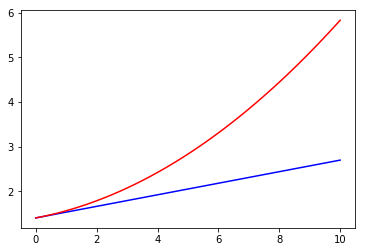

In [7]:
#Color lines 
plt.plot(x, y_lin[0], color='blue') #note that some plotting functions only accept 'color' rather than 'c'
plt.plot(x, y_quad[0], c='r') #these calls yield built-in python colors, which aren't nice; see colorscheme section
plt.show()

In [8]:
#Define custom colors; many formats work
stanford_colors = ["#8c1515", "#4d4f53", "#B1040E"]
ucsb_colors = np.asarray([(0., 54., 96.), (254., 188., 17.), (4., 133., 155.)])/255.

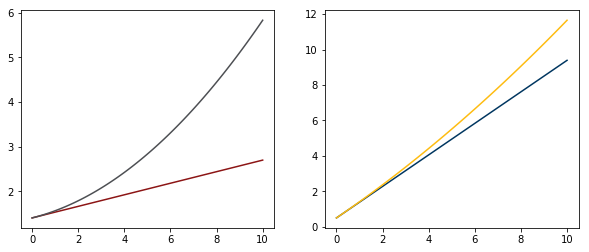

In [9]:
fig = plt.figure(figsize=(10,4))

ax1 = fig.add_subplot(121)
ax1.plot(x, y_lin[0], c=stanford_colors[0])
ax1.plot(x, y_quad[0], c=stanford_colors[1])

ax2 = fig.add_subplot(122)
ax2.plot(x, y_lin[1], c=ucsb_colors[0])
ax2.plot(x, y_quad[1], c=ucsb_colors[1])

plt.show()

In [10]:
#Linestyles, linewidths, and transparency
linestyles = ['-', '--', '-.', ':']
linewidths = np.arange(1.,3.,0.5)
alphas = np.arange(0.01,1.,0.05)

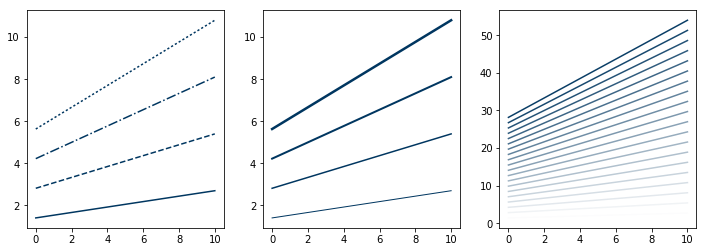

In [11]:
fig = plt.figure(figsize=(12,4))

ax1 = fig.add_subplot(131)
for i in range(len(linestyles)):
    ax1.plot(x, (1.+i)*y_lin[0], color=ucsb_colors[0], linestyle=linestyles[i])

ax2 = fig.add_subplot(132)
for i in range(len(linewidths)):
    ax2.plot(x, (1.+i)*y_lin[0], color=ucsb_colors[0], linewidth=linewidths[i])
    
ax3 = fig.add_subplot(133)
for i in range(len(alphas)):
    ax3.plot(x, (1.+i)*y_lin[0], color=ucsb_colors[0], alpha=alphas[i])

plt.show()

### Manipulating Labels, Ticks, and Legends

Here are examples of how to add axes labels, titles, custom ticks and ticklabels, and legends:

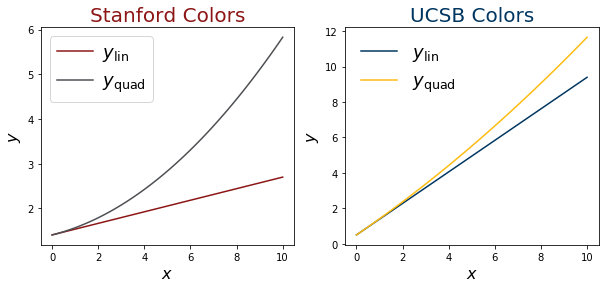

In [12]:
#Adding tick labels, titles, and legends
fig = plt.figure(figsize=(10,4))

ax1 = fig.add_subplot(121)
ax1.plot(x, y_lin[0], c=stanford_colors[0], label=r'$y_{\rm{lin}}$') # r'$$' for TeX
ax1.plot(x, y_quad[0], c=stanford_colors[1], label=r'$y_{\rm{quad}}$')

ax1.legend(loc=2, prop={'size':18}, handletextpad=0.5) #handletextpad controls legend/text spacing; default is 1.0
ax1.set_xlabel(r'$x$', fontsize=16) #if you're not using a subplot, you can just call plt.xlabel, plt.title, etc.
ax1.set_ylabel(r'$y$', fontsize=16)
ax1.set_title('Stanford Colors', fontsize=20, color=stanford_colors[0])

ax2 = fig.add_subplot(122)
ax2.plot(x, y_lin[1], c=ucsb_colors[0], label=r'$y_{\rm{lin}}$')
ax2.plot(x, y_quad[1], c=ucsb_colors[1], label=r'$y_{\rm{quad}}$')

ax2.legend(loc=2, prop={'size':18}, frameon=False)
ax2.set_xlabel(r'$x$', fontsize=16)
ax2.set_ylabel(r'$y$', fontsize=16)
ax2.set_title('UCSB Colors', fontsize=20, color=ucsb_colors[0])

plt.show()

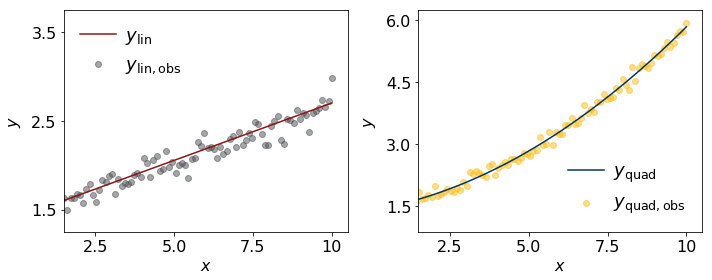

In [13]:
#Customizing ticks
f, ax = plt.subplots(1,2,sharex='row',sharey='none',figsize=(10,4))

ax[0].plot(x, y_lin[0], c=stanford_colors[0], label=r'$y_{\rm{lin}}$')
ax[0].scatter(x, y_lin[0] + 0.1*np.random.randn(len(x)), alpha=0.5, c=stanford_colors[1], label=r'$y_{\rm{lin,obs}}$')

ax[0].set_xticks([2.5,5.0,7.5,10])
ax[0].set_xticklabels(['2.5','5.0','7.5', '10'], fontsize=16)
ax[0].set_yticks([1.5,2.5,3.5])
ax[0].set_yticklabels(['1.5','2.5','3.5'], fontsize=16)

ax[0].set_xlim(1.5,10.5)
ax[0].set_ylim(1.25,3.75)
ax[0].legend(loc=2, prop={'size':18}, frameon=False, handletextpad=0.5)
ax[0].set_xlabel(r'$x$', fontsize=16)
ax[0].set_ylabel(r'$y$', fontsize=16, labelpad=8) #adds space between axis label and plot

ax[1].plot(x, y_quad[0], c=ucsb_colors[0], label=r'$y_{\rm{quad}}$')
ax[1].scatter(x, y_quad[0] + 0.1*np.random.randn(len(x)), alpha=0.5, c=ucsb_colors[1], label=r'$y_{\rm{quad,obs}}$')

ax[1].set_xticks([2.5,5.0,7.5,10])
ax[1].set_xticklabels(['2.5','5.0','7.5', '10'], fontsize=16)
ax[1].set_yticks([1.5,3.0,4.5,6.0])
ax[1].set_yticklabels(['1.5', '3.0', '4.5', '6.0'], fontsize=16)

ax[1].legend(loc=4, prop={'size':18}, frameon=False, handletextpad=0.5)
ax[1].set_xlabel(r'$x$', fontsize=16)
ax[1].set_ylabel(r'$y$', fontsize=16, labelpad=8)

plt.tight_layout() #this is an extremely helpful command; check what happens without it!
plt.show()

### Digression: Log Plots

Let's plot $y_{\rm{quad}}$ on a log-log scale (this should show up as a straight line since it's a power law). Tick labels are a bit of a pain in this case; the default tick labels are base-10, and minor ticks show up automatically. Here we make the y-axis ticks and labels "normal" to illustrate the difference:

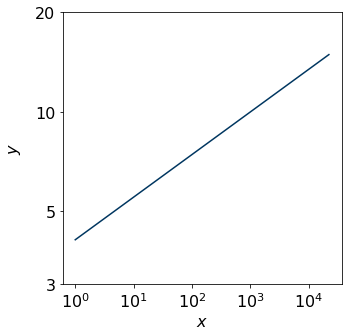

In [14]:
fig = plt.figure(figsize=(5,5))

ax = fig.add_subplot(111)
ax.loglog(np.exp(x), np.exp(y_lin[0]), c=ucsb_colors[0], label=r'$y_{\rm{lin}}$')

ax.set_xticks([1,10,100,1000,10000])
ax.set_xticklabels([r'$10^0$', r'$10^1$', r'$10^2$', r'$10^3$', r'$10^4$'], fontsize=16)
ax.set_yticks([3,5,10,20])
ax.set_yticklabels([3,5,10,20], fontsize=16)
ax.minorticks_off() #try running with this line commented out

ax.set_xlabel(r'$x$', fontsize=16)
ax.set_ylabel(r'$y$', fontsize=16, labelpad=12)

plt.show()

What if we want both minor ticks and custom labels? Here is one workaround ...

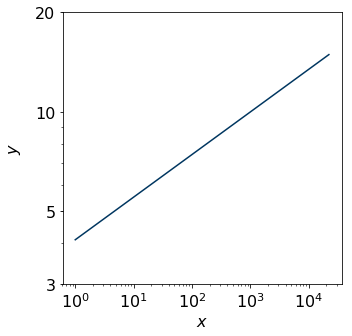

In [15]:
fig = plt.figure(figsize=(5,5))

ax = fig.add_subplot(111)
ax.loglog(np.exp(x), np.exp(y_lin[0]), c=ucsb_colors[0], label=r'$y_{\rm{lin}}$')

ax.set_xticks([1,10,100,1000,10000])
ax.set_xticklabels([r'$10^0$', r'$10^1$', r'$10^2$', r'$10^3$', r'$10^4$'], fontsize=16)
ax.set_yticks([3,5,10,20])
ax.set_yticklabels([3,5,10,20], fontsize=16)
ax.set_yticklabels([r'',r'',r'',r''],minor=True)

ax.set_xlabel(r'$x$', fontsize=16)
ax.set_ylabel(r'$y$', fontsize=16, labelpad=12)

plt.show()

### Putting it Together

Let's put everything together and make a nice plot of the observed and true $y_{\rm{lin}}$ and $y_{\rm{quad}}$ along with the ratio $y_{\rm{lin}}$/$y_{\rm{quad}}$ in the bottom panel. We'll demonstrate a few more useful features like plt.fill_between and plt.text:

In [16]:
#Define a down arrow object
arrow = u'$\u2193$'

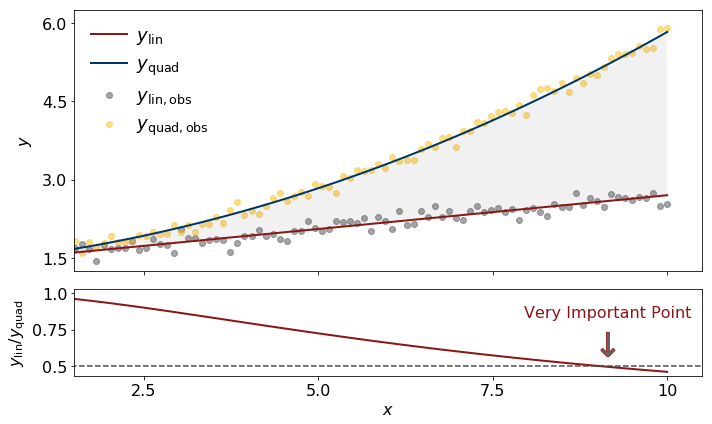

In [17]:
#Height ratio for shorter bottom panel
f, ax = plt.subplots(2,1, sharex='col', sharey='row', figsize=(10,6), gridspec_kw={'height_ratios':[3, 1]})

ax[0].plot(x, y_lin[0], c=stanford_colors[0], label=r'$y_{\rm{lin}}$', linewidth=2)
ax[0].scatter(x, y_lin[0] + 0.1*np.random.randn(len(x)), alpha=0.5, c=stanford_colors[1], label=r'$y_{\rm{lin,obs}}$')
ax[0].plot(x, y_quad[0], c=ucsb_colors[0], label=r'$y_{\rm{quad}}$', linewidth=2)
ax[0].scatter(x, y_quad[0] + 0.1*np.random.randn(len(x)), alpha=0.5, c=ucsb_colors[1], label=r'$y_{\rm{quad,obs}}$')
ax[0].fill_between(x, y_lin[0], y_quad[0], facecolor=stanford_colors[1], alpha=0.075)

ax[0].set_yticks([1.5,3.0,4.5,6.0])
ax[0].set_yticklabels(['1.5','3.0','4.5', '6.0'], fontsize=16)
ax[0].set_xlim(1.5,10.5)
ax[0].set_ylim(1.25,6.25)
ax[0].legend(loc=2, prop={'size':18}, frameon=False, handletextpad=0.5)
ax[0].set_ylabel(r'$y$', fontsize=16, labelpad=8)

ax[1].plot(x, y_lin[0]/y_quad[0], c=stanford_colors[0], label=r'$y_{\rm{quad}}$', linewidth=2)
ax[1].plot(np.arange(0,20,1), 0.5*np.ones(20), color=stanford_colors[1], linestyle='--')
ax[1].scatter(x[np.argmin(np.abs(y_lin[0]/y_quad[0] - 0.5))], 0.65, alpha=0.85,
              marker=arrow, s=600, facecolor=stanford_colors[1], edgecolor=stanford_colors[0])
ax[1].text(x[np.argmin(np.abs(y_lin[0]/y_quad[0] - 0.5))] - 1.15, 0.835, 
           'Very Important Point', fontsize=16, color=stanford_colors[0])

ax[1].set_xticks([2.5,5.0,7.5,10])
ax[1].set_xticklabels(['2.5','5.0','7.5', '10'], fontsize=16)
ax[1].set_yticks([0.5,0.75,1.0])
ax[1].set_yticklabels(['0.5','0.75','1.0'], fontsize=16)
ax[1].set_xlabel(r'$x$', fontsize=16)
ax[1].set_ylabel(r'$y_{\rm{lin}}/y_{\rm{quad}}$', fontsize=16)

plt.tight_layout()
plt.show()

## How to Make Nice Plots II: Special Cases <a class="anchor" id="third-bullet"></a>

This is a collection of special cases that I've come across; feel free to add your own!  

### Multiple Axes and Scales

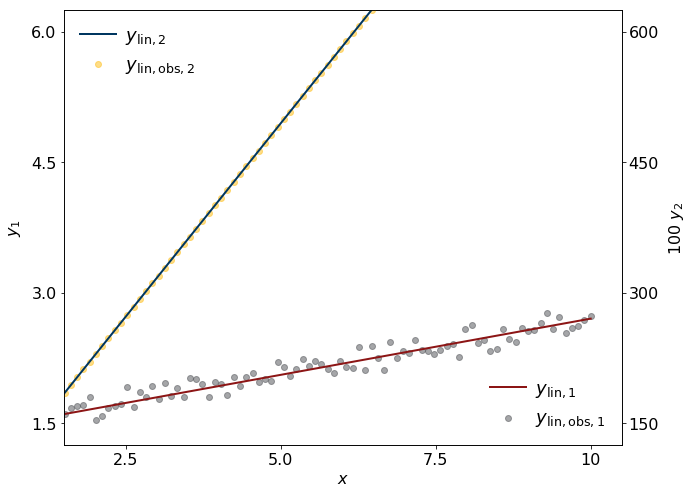

In [18]:
f, ax = plt.subplots(1, 1, figsize=(10,8))

ax.plot(x, y_lin[0], c=stanford_colors[0], label=r'$y_{\rm{lin},1}$', linewidth=2)
ax.scatter(x, y_lin[0] + 0.1*np.random.randn(len(x)), alpha=0.5, c=stanford_colors[1], label=r'$y_{\rm{lin,obs},1}$')
ax.set_xticks([2.5,5.0,7.5,10])
ax.set_xticklabels(['2.5','5.0','7.5', '10'], fontsize=16)
ax.set_yticks([1.5,3.0,4.5,6.0])
ax.set_yticklabels(['1.5','3.0','4.5', '6.0'], fontsize=16)
ax.set_xlim(1.5,10.5)
ax.set_ylim(1.25,6.25)
ax.legend(loc=4, prop={'size':18}, frameon=False, handletextpad=0.5)
ax.set_xlabel(r'$x$', fontsize=16)
ax.set_ylabel(r'$y_1$', fontsize=16, labelpad=8)

ax2 = ax.twinx()  #A second axis that shares the same x-scale; the y-scale is different
ax2.plot(x, 100.*y_lin[1], c=ucsb_colors[0], label=r'$y_{\rm{lin},2}$', linewidth=2)
ax2.scatter(x, 100.*y_lin[1] + 0.1*np.random.randn(len(x)), alpha=0.5, c=ucsb_colors[1], label=r'$y_{\rm{lin,obs},2}$')
ax2.set_yticks([150,300,450,600])
ax2.set_yticklabels(['150','300','450', '600'], fontsize=16)
ax2.set_xlim(1.5,10.5)
ax2.set_ylim(125,625)
ax2.legend(loc=2, prop={'size':18}, frameon=False, handletextpad=0.5)
ax2.set_ylabel(r'$100\ y_2$', fontsize=16, labelpad=8)
ax2.tick_params(labelbottom='off',which='minor')

plt.show()

### Multiple Legends

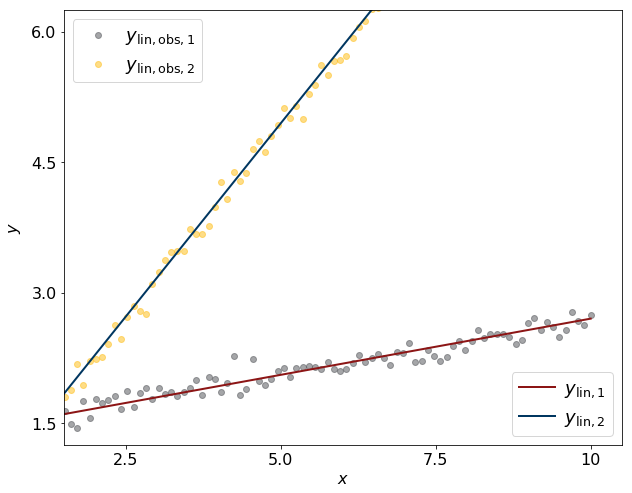

In [19]:
f, ax = plt.subplots(1, 1, figsize=(10,8))

pred1 = ax.plot(x, y_lin[0], c=stanford_colors[0], label=r'$y_{\rm{lin},1}$', linewidth=2)
obs1 = ax.scatter(x, y_lin[0] + 0.1*np.random.randn(len(x)), alpha=0.5, c=stanford_colors[1], label=r'$y_{\rm{lin,obs},1}$')
pred2 = ax.plot(x, y_lin[1], c=ucsb_colors[0], label=r'$y_{\rm{lin},2}$', linewidth=2)
obs2 = ax.scatter(x, y_lin[1] + 0.1*np.random.randn(len(x)), alpha=0.5, c=ucsb_colors[1], label=r'$y_{\rm{lin,obs},2}$')

#Define each legend, calling the desired legend handles
first_legend = plt.legend(handles=[pred1[0],pred2[0]], loc=4, prop={'size':18}, handletextpad=0.5)
plt.gca().add_artist(first_legend)
plt.legend(handles=[obs1,obs2], loc=2, prop={'size':18},handletextpad=0.5)

ax.set_xticks([2.5,5.0,7.5,10])
ax.set_xticklabels(['2.5','5.0','7.5', '10'], fontsize=16)
ax.set_yticks([1.5,3.0,4.5,6.0])
ax.set_yticklabels(['1.5','3.0','4.5', '6.0'], fontsize=16)
ax.set_xlim(1.5,10.5)
ax.set_ylim(1.25,6.25)
ax.set_xlabel(r'$x$', fontsize=16)
ax.set_ylabel(r'$y$', fontsize=16, labelpad=8)

plt.show()

### Plot-in-Plot

/Users/eon/miniconda3/lib/python3.5/site-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


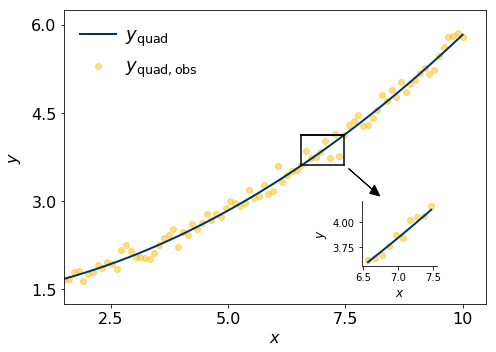

In [20]:
f,ax = plt.subplots(figsize=(7,5))
idx = np.logical_and(x>6.5,x<7.5)

ax.plot(x, y_quad[0], c=ucsb_colors[0], label=r'$y_{\rm{quad}}$', linewidth=2)
ax.scatter(x, y_quad[0] + 0.1*np.random.randn(len(x)), alpha=0.5, c=ucsb_colors[1], label=r'$y_{\rm{quad,obs}}$')
ax.plot(x[idx],y_quad[0][idx][0]*np.ones(len(x[idx])),'k')

#Plot a box around the zoom-in region
ax.plot(x[idx][0]*np.ones(len(x[idx])),np.linspace(y_quad[0][idx][0],y_quad[0][idx][-1],len(x[idx])),'k')
ax.plot(x[idx][-1]*np.ones(len(x[idx])),np.linspace(y_quad[0][idx][0],y_quad[0][idx][-1],len(x[idx])),'k')
ax.plot(x[idx],y_quad[0][idx][-1]*np.ones(len(x[idx])),'k')
ax.plot(x[idx],y_quad[0][idx][-1]*np.ones(len(x[idx])),'k')

ax.set_xticks([2.5,5.0,7.5,10])
ax.set_xticklabels(['2.5','5.0','7.5', '10'], fontsize=16)
ax.set_yticks([1.5,3.0,4.5,6.0])
ax.set_yticklabels(['1.5','3.0','4.5', '6.0'], fontsize=16)
ax.set_xlim(1.5,10.5)
ax.set_ylim(1.25,6.25)
ax.legend(loc=2, prop={'size':18}, frameon=False, handletextpad=0.5)
ax.set_xlabel(r'$x$', fontsize=16)
ax.set_ylabel(r'$y$', fontsize=16, labelpad=8)

#Define the plot-in-plot. (See what happens without the spines commands)
left, bottom, width, height = [0.725, 0.25, 0.15, 0.18]
ax2 = f.add_axes([left, bottom, width, height])
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

ax2.plot(x[idx], y_quad[0][idx], c=ucsb_colors[0], linewidth=2)
ax2.scatter(x[idx], y_quad[0][idx] + 0.1*np.random.randn(len(x[idx])), alpha=0.5, c=ucsb_colors[1])

ax2.set_xlabel(r'$x$', fontsize=12)
ax2.set_ylabel(r'$y$', fontsize=12)
ax2.xaxis.set_ticks_position('bottom')
ax2.yaxis.set_ticks_position('left')

#The plt.arrow output isn't very attractive. If you have a better method, please share!
ax.arrow(7.57, 3.55, 0.5, -0.35, head_width=0.175, head_length=0.2, fc='k', ec='k')

plt.tight_layout()
plt.show()

### Inverting and Breaking Axes

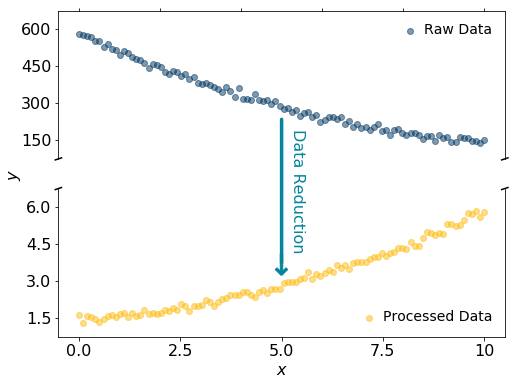

In [21]:
fig, (ax, ax2) = plt.subplots(2, 1, sharex=False, figsize=(8,6))

ax.invert_xaxis()
ax.scatter(x, 100*(y_quad[0] + 0.1*np.random.randn(len(x))), alpha=0.5, c=ucsb_colors[0], label=r'Raw Data')
ax2.scatter(x, y_quad[0] + 0.1*np.random.randn(len(x)), alpha=0.5, c=ucsb_colors[1], label=r'Processed Data')

#Hide the spines between ax and ax2
ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)

#Fix ticks
ax.xaxis.tick_top()
ax.tick_params(labeltop='off')
ax2.xaxis.tick_bottom()

ax.set_ylim(75,675)
ax2.set_ylim(0.75,6.75)
ax2.set_xticks([0,2.5,5.0,7.5,10])
ax2.set_xticklabels(['0.0','2.5','5.0','7.5', '10'], fontsize=16)
ax2.set_yticks([1.5,3.0,4.5,6.0])
ax2.set_yticklabels(['1.5','3.0','4.5','6.0'], fontsize=16)
ax.set_yticks([150,300,450,600])
ax.set_yticklabels([150,300,450,600], fontsize=16)
ax2.set_xlabel(r'$x$', fontsize=16)
fig.text(.05, .5, r'$y$', ha='center', va='center', rotation='vertical', fontsize=16) #otherwise label appears on bottom
fig.text(.54, .4624, 'Data Reduction', ha='center', va='center', rotation=270, fontsize=16, color=ucsb_colors[2])
ax.legend(loc=1, prop={'size':14}, frameon=False, handletextpad=0.)
ax2.legend(loc=4, prop={'size':14}, frameon=False, handletextpad=0.)

#Draw a line across subplots. Again, the arrow is not elegant! Someone should improve on this.
from matplotlib.patches import ConnectionPatch
con = ConnectionPatch(xyA=(5,3.75), xyB=(5,235), coordsA="data", coordsB="data",
                      axesA=ax2, axesB=ax, color=ucsb_colors[2], linewidth=3.5)
ax2.add_artist(con)
ax2.scatter(4.9235,3.7,marker=arrow,s=450,facecolor=ucsb_colors[2],zorder=999)

#Indicate plot break with diagonal lines
d = .007  #Size of diagonal lines in axes coordinates
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False) #top diagonals
ax.plot((-d, +d), (-d, +d), **kwargs)
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)
kwargs.update(transform=ax2.transAxes) #bottom diagonals
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)

plt.show()

### Images and Overplotting


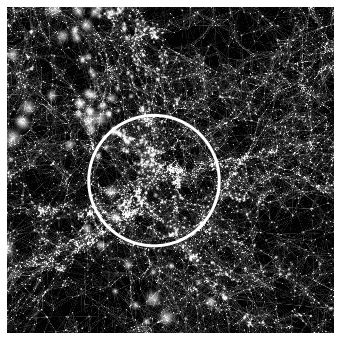

In [51]:
fig, ax = plt.subplots(1,1,figsize=(8,6))

img = plt.imread("cosmic_web.png")
ax.imshow(img, extent=[0, 300, 0, 300])

circle2 = plt.Circle((135, 140), 60, edgecolor='white', facecolor='none', linewidth=3)
ax.add_artist(circle2)

ax.tick_params(labelbottom='off')
ax.tick_params(labelleft='off')
plt.axis('off')

plt.show()

## Scatter Plots, Histograms, Bar Plots, Contour Plots, Projection Plots <a class="anchor" id="fourth-bullet"></a>

### Scatter Plots

Much of what we've seen applies to scatter plots, but there are few noteworthy features like errorbars. We'll also use this as an excuse to introduce colormaps.

In [22]:
#Define custom colormaps that fade to white
stanford_cmap = colors.LinearSegmentedColormap.from_list("", [stanford_colors[0], stanford_colors[2], "#ffffff"])
ucsb_cmap = colors.LinearSegmentedColormap.from_list("", [ucsb_colors[0], ucsb_colors[2], "#ffffff"])

In [23]:
#Make up some data
#idx = np.random.rand(len(x)) > 0.75
idx = np.array([False, False, False, False, False, False, False,  True, False, True, False, False, True, False, True, 
                False, False, False, False, False, False, False, False,  True, False, False, False, False, False, False, 
                False,  True,  True, False, False, False, False, False, False, False, False,  True, False, False, False,
                True, False, False, False, False,  True,  True, False, False, False, False, False, False,  True, False,
                False, False,  True, True, False,  True, False,  True, False,  True, False,  True, False, False, False, 
                False, False, False, False, False, False, False, False,  True, False, False, False, False,  True,  True,
                False, False, False, False,  True, False, False, False, False, False], dtype=bool)
yerrs = 0.25*np.random.randn(len(x[idx]))

/Users/eon/miniconda3/lib/python3.5/site-packages/matplotlib/colors.py:1113: RuntimeWarning: invalid value encountered in power
  np.power(resdat, gamma, resdat)
/Users/eon/miniconda3/lib/python3.5/site-packages/matplotlib/colors.py:494: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


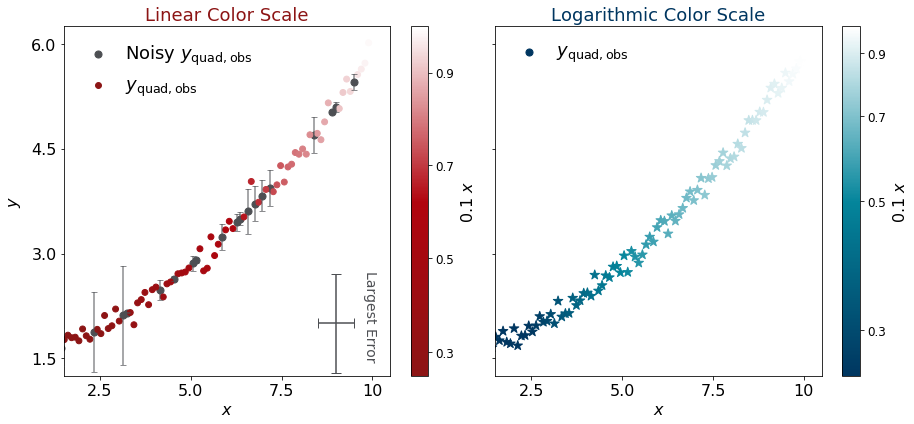

In [24]:
fig = plt.figure(figsize=(14,6))

ax1 = fig.add_subplot(121)
ax1.scatter(x[idx], y_quad[0][idx], s=50, c=stanford_colors[1], label=r'Noisy $y_{\rm{quad,obs}}$')
ax1.errorbar(x[idx], y_quad[0][idx], yerr=yerrs, linestyle='None', c=stanford_colors[1], 
             alpha=0.65, capsize=3, zorder=999) #errors are assumed to be symmetric unless otherwise specified

ax1.scatter(0., 0., s=35, label=r'$y_{\rm{quad,obs}}$', c=stanford_colors[0]) #dummy point to get right legend color 
obs1 = ax1.scatter(x[~idx], y_quad[0][~idx] + 0.1*np.random.randn(len(x[~idx])), s=35, c=0.1*x[~idx], cmap=stanford_cmap,
                   norm=colors.PowerNorm(gamma=0.99,vmin=0.25,vmax=1), zorder=1) #gamma is power-law index; try different values!

#Plot a lone errorbar
(_, caps, _) = ax1.errorbar([9], [2], yerr=[np.max(yerrs)], xerr=[0.5], markersize='0', 
                            ecolor=stanford_colors[1], capsize=5)
for cap in caps:
    cap.set_markeredgewidth(1)

#Show a colorbar
cbar1 = plt.colorbar(obs1, ticks=[0.3,0.5,0.7,0.9])
cbar1.ax.set_yticklabels(['0.3','0.5','0.7','0.9'], fontsize=12)
cbar1.set_label(r'$0.1\ x$',size=16,labelpad=6)
cbar1.solids.set_rasterized(True) #improves colorbar appearance in some cases
cbar1.solids.set_edgecolor("face") #improves colorbar appearance in some cases

ax1.set_xticks([2.5,5.0,7.5,10])
ax1.set_xticklabels(['2.5','5.0','7.5', '10'], fontsize=16)
ax1.set_yticks([1.5,3.0,4.5,6.0])
ax1.set_yticklabels(['1.5','3.0','4.5', '6.0'], fontsize=16)
ax1.set_xlim(1.5,10.5)
ax1.set_ylim(1.25,6.25)
ax1.legend(loc=2, prop={'size':18}, frameon=False, handletextpad=0.5)
ax1.set_xlabel(r'$x$', fontsize=16)
ax1.set_ylabel(r'$y$', fontsize=16, labelpad=8)
ax1.set_title(r'Linear Color Scale', fontsize=18, color=stanford_colors[0])
ax1.text(9.75,2.6,'Largest Error', fontsize=14, color=stanford_colors[1], rotation=270)

ax2 = fig.add_subplot(122)
ax2.scatter(0., 0., s=50, label=r'$y_{\rm{quad,obs}}$', c=ucsb_colors[0])
obs2 = ax2.scatter(x, y_quad[0] + 0.1*np.random.randn(len(x)), s=100, c=0.1*x, marker='*', cmap=ucsb_cmap, 
                   norm=colors.LogNorm(vmin=0.25, vmax=1)) #note the different colorbar scale

cbar2 = plt.colorbar(obs2, ticks=[0.3,0.5,0.7,0.9])
cbar2.ax.set_yticklabels(['0.3','0.5','0.7','0.9'], fontsize=12)
cbar2.ax.minorticks_off()
cbar2.set_label(r'$0.1\ x$',size=16,labelpad=6)
cbar2.solids.set_rasterized(True)
cbar2.solids.set_edgecolor("face")

ax2.set_xticks([2.5,5.0,7.5,10])
ax2.set_xticklabels(['2.5','5.0','7.5', '10'], fontsize=16)
ax2.set_yticks([1.5,3.0,4.5,6.0])
ax2.set_yticklabels(['','','',''])
ax2.set_xlim(1.5,10.5)
ax2.set_ylim(1.25,6.25)
ax2.legend(loc=2, prop={'size':18}, frameon=False, handletextpad=0.5)
ax2.set_xlabel(r'$x$', fontsize=16)
ax2.set_title(r'Logarithmic Color Scale', fontsize=18, color=ucsb_colors[0])

plt.tight_layout()
fig.subplots_adjust(right=0.9) #this command is extremely useful! Try playing around with it.
plt.show()

### Histograms

Here's a histogram example:

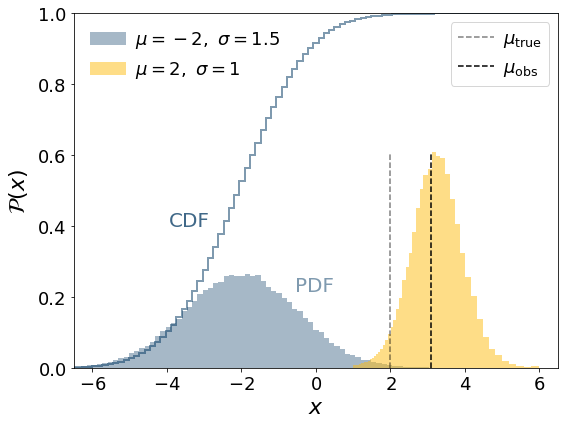

In [25]:
f,ax = plt.subplots(1,1,figsize=(8,6))

x3 = np.linspace(0.,6.5,10**5)
y3 = np.sort(np.random.randn(10**5))

hist1 = ax.hist(-2.+1.5*np.random.randn(10**5), color=ucsb_colors[0], bins=np.linspace(-7,7,100), 
        histtype='stepfilled', linewidth=2, alpha=0.35, label=r'$\mu=-2,\ \sigma=1.5$', normed=True)
hist2 = ax.hist(-2.+1.5*np.random.randn(10**5), color=ucsb_colors[0], bins=np.linspace(-7,7,100), 
        histtype='step', linewidth=2, alpha=0.5, normed=True, cumulative=True)
hist3 = ax.hist(2.+y3, color=ucsb_colors[1], bins=np.logspace(0,np.log10(6),50), weights=np.exp(x3), 
                alpha=0.5, label=r'$\mu=2,\ \sigma=1$', normed=True)

centers = 0.5*(hist3[1][:-1]+hist3[1][1:])
mean = np.average(centers,weights=hist3[0],axis=0)

mu_true = ax.plot(2.*np.ones(10), np.linspace(0,np.max(hist3[0]),10), 'k--', alpha=0.5, label=r'$\mu_{\rm{true}}$')
mu_obs = ax.plot(mean*np.ones(10), np.linspace(0,np.max(hist3[0]),10), 'k--', label=r'$\mu_{\rm{obs}}$')

ax.set_xlim(-6.5,6.5)
ax.set_ylim(0,1)
ax.set_xticks([-6,-4,-2,0,2,4,6])
ax.set_xticklabels([r'$-6$',r'$-4$',r'$-2$',r'$0$',r'$2$',r'$4$',r'$6$',],fontsize=18)
ax.set_yticks([0,0.2,0.4,0.6,0.8,1.0])
ax.set_yticklabels(['0.0','0.2','0.4','0.6','0.8','1.0'],fontsize=18)
ax.set_xlabel(r'$x$',fontsize=22)
ax.set_ylabel(r'$\mathcal{P}(x)$',fontsize=22,labelpad=8)
ax.text(-3.95, 0.4, 'CDF', fontsize=20, color=ucsb_colors[0], alpha=0.75)
ax.text(-0.57, 0.215, 'PDF', fontsize=20, color=ucsb_colors[0], alpha=0.5)

#Making multiple legends is slightly tricky in this case. First show the plt.plot legends:
first_legend = plt.legend(handles=[mu_true[0], mu_obs[0]], loc=1, prop={'size':18}, handletextpad=0.5)
plt.gca().add_artist(first_legend)

#Now create legend handles for the hist objects (python indexes them last by default because they aren't line objects)
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles=[handles[2],handles[3]], loc=2, prop={'size':18}, handletextpad=0.5, frameon=False)

plt.tight_layout()
plt.show()

### Bar Plots

Let's check out bar plots. At this point I'm going to import my favorite plotting package, [Seaborn](https://seaborn.pydata.org/), for access to its color palletes and contour plotting commands for the following sections. I **highly recommend** checking out Seaborn and the examples on the website, for inspiration if nothing else!

In [26]:
import seaborn as sns
sns.set_style("white")

bright_colors = sns.color_palette("bright", 10)
custom_orange = (255/255.0, 148/255.0, 8/255.0, 1.0)
custom_orange = np.asarray(custom_orange)

This example is straight from my research, but hopefully it illustrates most plt.bar functionality:

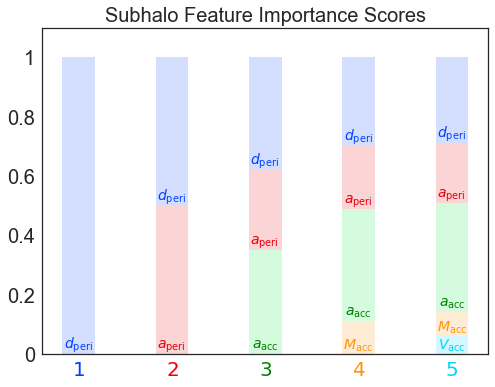

In [27]:
f,ax = plt.subplots(1,1,figsize=(8,6))

alpha = 0.17
N = 5

features1 = (1, 0.50, 0.35, 0.11, 0.06)
features2 = (0, 0.50, 0.27, 0.38, 0.08)
features12 = np.array(features1) + np.array(features2)
features3 = (0, 0, 0.38, 0.21, 0.37)
features123 = features12 + features3
features4 = (0, 0, 0, 0.30, 0.20)
features1234 = features123 + features4
features5 = (0, 0, 0, 0, 0.29)

ind = np.linspace(0,4,5) #the x locations for the groups
width = 0.35 #the width of the bars

p1 = ax.bar(ind, features1, width, 
            color=(bright_colors[0],bright_colors[2],bright_colors[1],custom_orange,bright_colors[5]),alpha=alpha)
p2 = ax.bar(ind, features2, width, bottom=features1, 
            color=(bright_colors[5],bright_colors[0],bright_colors[2],bright_colors[1],custom_orange,custom_orange), alpha=alpha)
p3 = ax.bar(ind, features3, width, bottom=features12, 
            color=(custom_orange,bright_colors[5],bright_colors[0],bright_colors[2],bright_colors[1],bright_colors[3]), alpha=alpha)
p4 = ax.bar(ind, features4, width, bottom=features123, 
            color=(bright_colors[3],custom_orange,bright_colors[5],bright_colors[0],bright_colors[2],bright_colors[1]), alpha=alpha)
p5 = ax.bar(ind, features5, width, bottom=features1234, 
            color=(bright_colors[0]), alpha=alpha)

ax.set_ylim(0,1.1)
ax.set_title('Subhalo Feature Importance Scores', fontsize=20)
ax.set_xticks(ind)
ax.set_xticklabels((r'$1$', r'$2$', r'$3$', r'$4$', r'$5$'), fontsize=20)
ax.set_yticks((0,0.2,0.4,0.6,0.8,1.0))
ax.set_yticklabels(('0', '0.2', '0.4', '0.6', '0.8', '1'), fontsize=20)

[t.set_color(i) for (i,t) in
 zip([bright_colors[0],bright_colors[2],'g',custom_orange,bright_colors[5]],ax.xaxis.get_ticklabels())]

x_dperi, y_dperi = np.linspace(-0.1605,3.8395,5), [0.02,0.52,0.64,0.72,0.73]
for i in range(len(x_dperi)):
    ax.text(x_dperi[i],y_dperi[i],r'$d_{\rm{peri}}$',fontsize=14,fontweight='bold',color=bright_colors[0],zorder=10)

x_aperi, y_aperi = np.linspace(0.8415,3.8415,4), [0.02,0.37,0.51,0.53]
for i in range(len(x_aperi)):
    ax.text(x_aperi[i],y_aperi[i],r'$a_{\rm{peri}}$',fontsize=14,fontweight='bold',color=bright_colors[2],zorder=10)

x_aacc, y_aacc = np.linspace(1.857,3.857,3), [0.02,0.13,0.16]
for i in range(len(x_aacc)):
    ax.text(x_aacc[i],y_aacc[i],r'$a_{\rm{acc}}$',fontsize=14,fontweight='bold',color='g',zorder=10)

x_Macc, y_Macc = np.linspace(2.838,3.838,2), [0.0175,0.0775]
for i in range(len(x_Macc)):
    ax.text(x_Macc[i],y_Macc[i],r'$M_{\rm{acc}}$',fontsize=14,fontweight='bold',color=custom_orange,zorder=10)

ax.text(3.85,0.01436725,r'$V_{\rm{acc}}$',fontsize=14,fontweight='bold',color=bright_colors[5],zorder=10)

plt.subplots_adjust(wspace=0.25)
plt.show()

### Contour Plots

Next, contour plots. I prefer Seaborn's kdeplot function, but check out [hist2d](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist2d.html) if you want to use matplotlib only.

In [28]:
#Make up some data
mean, cov = [-0.5, 0], [[1, 0], [0, 1]]
xvals, yvals = np.random.multivariate_normal(mean, cov, 10**4).T

mean2, cov2 = [0.75, -0.5], [[1, 1], [1, 1]]
xvals2, yvals2 = np.random.multivariate_normal(mean2, cov2, 10**4).T

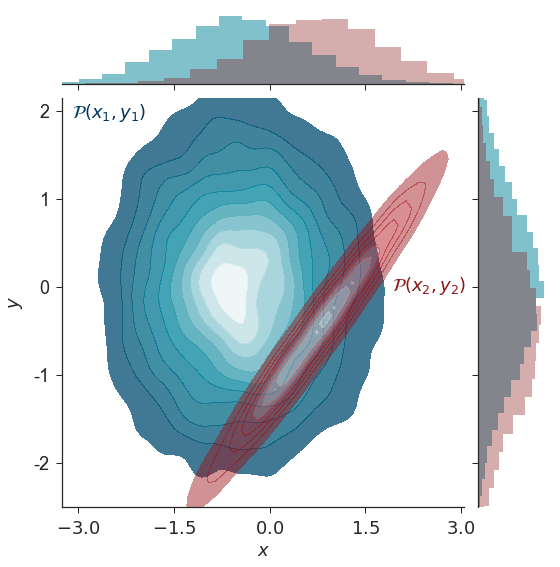

In [29]:
sns.set_style("ticks")
fig = plt.figure(figsize=(8,6))

#First define the JointGrid object, then add objects to it
q = sns.JointGrid(x = xvals, y = yvals, xlim=(-3.25,3.05), ylim=(-2.5,2.15), size=8)
q = q.plot_joint(sns.kdeplot, cmap=ucsb_cmap, shade=True, shade_lowest=False, alpha=0.75)
ax = sns.kdeplot(xvals2, yvals2, cmap=stanford_cmap, shade=True, shade_lowest=False, alpha=0.45)

q.ax_marg_x.hist(xvals, bins = 20, color=ucsb_colors[2], alpha = 0.5, normed=True)
q.ax_marg_y.hist(yvals, bins = 40, orientation = 'horizontal', color=ucsb_colors[2], alpha = 0.5, normed=True)
q.ax_marg_x.hist(xvals2, bins = 20, color=stanford_colors[0], alpha = 0.35, normed=True)
q.ax_marg_y.hist(yvals2, bins = 40, orientation = 'horizontal', color=stanford_colors[0], alpha = 0.35, normed=True)

ax.set_xticks([-3,-1.5,0.,1.5,3])
ax.set_xticklabels([r'$-3.0$',r'$-1.5$',r'$0.0$',r'$1.5$',r'$3.0$'],fontsize=18)
ax.set_yticks([-2,-1,0,1,2])
ax.set_yticklabels([-2,-1,0,1,2],fontsize=18)
plt.xlabel(r'$x$', fontsize=18)
plt.ylabel(r'$y$', fontsize=18, labelpad=8)

q.ax_joint.text(-3.1, 1.925, r'$\mathcal{P}(x_1,y_1)$', fontsize=18, color=ucsb_colors[0])
q.ax_joint.text(1.925, -0.05, r'$\mathcal{P}(x_2,y_2)$', fontsize=18, color=stanford_colors[0])

plt.gcf().subplots_adjust(bottom=0.11)
plt.gcf().subplots_adjust(left=0.125)
plt.show()

### Projection Plots

And finally, projection plots. This is a nice use case [Astropy](http://www.astropy.org/) (check this out if you don't know about it!) to define on-sky coordinates:

In [30]:
import astropy.units as u
from astropy.coordinates import Angle, SkyCoord

#Make up some data
a = Angle(np.random.uniform(0., 360., 100) * u.deg)
b = Angle(np.degrees(np.arcsin(np.random.uniform(-1., 1., 100))) * u.deg)

#Define a SkyCoord object
co = SkyCoord(ra = a, dec = b)
lon = co.galactic.l.wrap_at(180 * u.deg).radian
lat = co.galactic.b.wrap_at(180 * u.deg).radian

lon_below = lon[lat<0]
lon_above = lon[lat>0]

lat_below = lat[lat<0]
lat_above = lat[lat>0]

/Users/eon/miniconda3/lib/python3.5/site-packages/matplotlib/collections.py:865: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


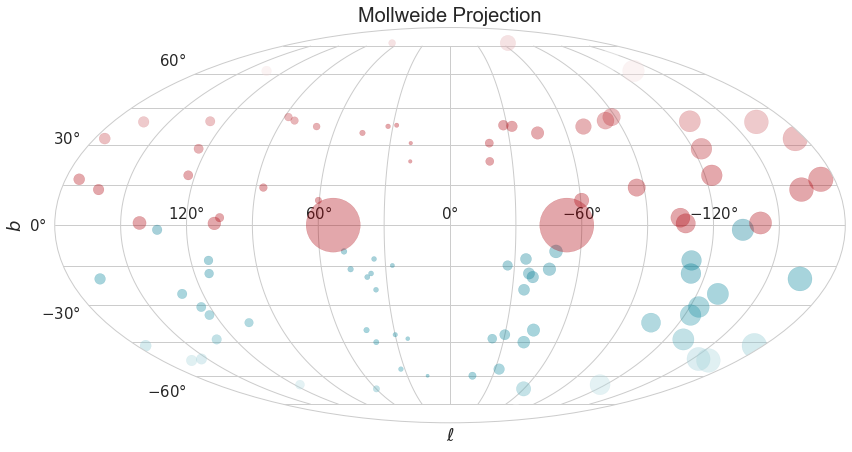

In [31]:
sns.set_style("whitegrid")
fig = plt.figure(figsize=(12,12))

ax = fig.add_subplot(111, projection="mollweide")

ax.scatter(lon_below, lat_below, c=lon_below*lat_below**2, cmap=ucsb_cmap, 
                s=lon_below/lat_below.clip(min=0.005), alpha=0.35)
ax.scatter(-1.*lon_below, lat_below, c=lon_below*lat_below**2, cmap=ucsb_cmap, 
           s=lon_below/lat_below.clip(min=0.025), alpha=0.35)

ax.scatter(lon_above, lat_above, c=lon_above*lat_above**2, cmap=stanford_cmap, 
           s=lon_above/lat_above.clip(max=0.005), alpha=0.35)
ax.scatter(-1.*lon_above, lat_above, c=lon_above*lat_above**2, cmap=stanford_cmap, 
           s=lon_above/lat_above.clip(max=0.025), alpha=0.35)

tick_labels_x = np.array(['', r'$120\degree$', '', r'$60\degree$', '', r'$0\degree$', '', 
                          r'$-60\degree$', '', r'$-120\degree$', ''])
tick_labels_y = np.array(['', r'$-60\degree$', '', r'$-30\degree$', '', r'$0\degree$', '', 
                          r'$30\degree$', '', r'$60\degree$', ''])
ax.set_xticklabels(tick_labels_x, zorder = 100,fontsize=15)
ax.set_yticklabels(tick_labels_y, zorder = 15,fontsize=15)
ax.set_title('Mollweide Projection',fontsize=20)
ax.set_xlabel(r'$\ell$', fontsize=18)
ax.set_ylabel(r'$b$', fontsize=18)

plt.tight_layout()
plt.show()

## Colorschemes <a class="anchor" id="fifth-bullet"></a>

Choosing colors that work well together is important for quality data visualization. You can find all of the named colors in matplotlib [here](https://matplotlib.org/examples/color/named_colors.html), but choosing colors that look good on their own isn't sufficient -- colors have to pair well for a plot to look nice. Unfortunately, the default matplotlib colors don't achieve either: 

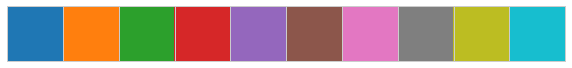

In [32]:
#Find the default colors using print(plt.rcParams['axes.prop_cycle'])
sns.palplot(['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', 
             '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])

Yikes. How can we do better? The practical answer, unless you're willing to spend a while customizing your own color palette (don't look at me, I've definitely never done this), is to use a premade colorscheme. Seaborn has nice options that are documented [here](https://seaborn.pydata.org/tutorial/color_palettes.html) (you can use the palettes without using Seaborn itself).

In general, I try to avoid bright colors in favor of gradients and color pairs that highlight the different elements of a plot. Colors shouldn't distract the viewer; rather, they should highlight the messages that your plot is supposed to convey. Before getting into the details, here are two useful definitions: 

**Hue:** "The degree to which a stimulus can be described as similar to or different from stimuli that are described as red, green, blue, and yellow." ([Wikipedia](https://en.wikipedia.org/wiki/Hue))

**Color Value:** (or lightness): How bright a color of a given hue is.

### Color Gradients (Monochromatic Schemes)

Here the idea is to fix hue and vary color value; this can be effective if your plot elements are qualitatively similar but you want to highlight certain elements. Seaborn's built-in color palettes are quasi-monochromatic, but we can do better by defining a custom palette; see [this useful link](http://www.december.com/html/spec/colorhslhex10.html) for colors specified by hue.

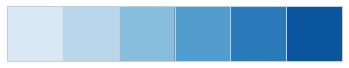

In [33]:
#Sort-of-monochromatic Seaborn colors
sns.palplot(sns.color_palette("Blues"))

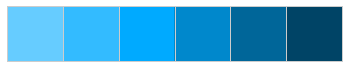

In [34]:
#Custom monochromatic palette (200 degree hue)
custom_blues = ["#66CCFF", "#33BBFF", "#00AAFF", "#0088CC", "#006699", "#004466"]
sns.palplot(custom_blues)

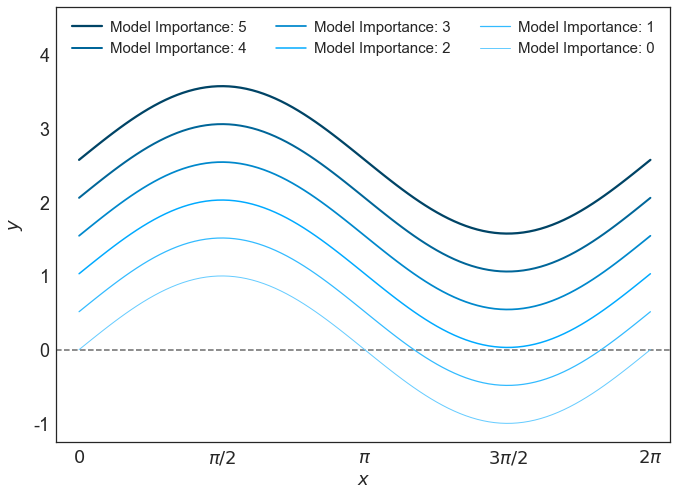

In [35]:
sns.set_style("white")
fig = plt.figure(figsize=(11,8))

xpts = np.linspace(0., 2.*np.pi, 100)
for i in reversed(range(len(custom_blues))):
    plt.plot(xpts, 0.515*i+np.sin(xpts), c=custom_blues[i], linewidth=(1.5*i+6.)/len(custom_blues), 
             label=r'Model Importance: {:01d}'.format(i), zorder=999)
plt.plot(np.linspace(-0.25,6.5,100), np.zeros(100), 'gray', linestyle='--', zorder=1)

plt.xlim(-0.25,6.5)
plt.ylim(-1.25,4.65)
plt.xticks([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi], [r'$0$',r'$\pi /2$',r'$\pi$',r'$3\pi /2$',r'$2\pi$'],fontsize=18)
plt.yticks([-1,0,1,2,3,4], [-1,0,1,2,3,4], fontsize=18)
plt.xlabel(r'$x$', fontsize=18)
plt.ylabel(r'$y$', fontsize=18, labelpad=8)
plt.legend(loc='upper center', ncol=3, prop={'size':15}, handletextpad=0.5, frameon=False)

plt.show()

### Pairing Colors (Complementary and Split Complementary Schemes)

Color pairing is based on rotations around the colorwheel. For example, to find a pair of colors for a basic two-color scheme, choose hues offset by $180^{\circ}$:

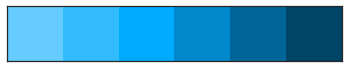

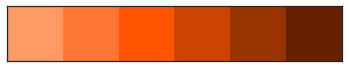

In [36]:
#Complement to custom blues (20 degree hue)
custom_blues_complement = ["#FF9966", "#FF7733", "#FF5500", "#CC4400", "#993300", "#662200"]

sns.palplot(custom_blues)
sns.palplot(custom_blues_complement)

A simple two-color complementary scheme is useful for contrasting qualitatively different models:

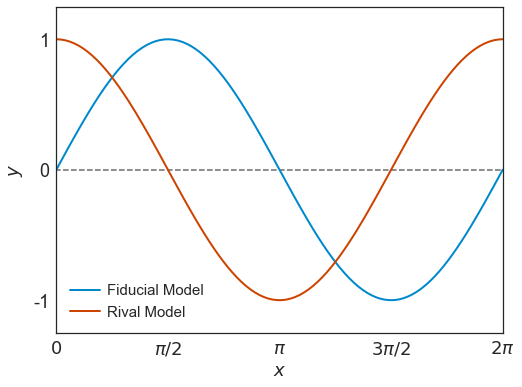

In [37]:
fig = plt.figure(figsize=(8,6))

plt.plot(xpts, np.sin(xpts), c=custom_blues[3], linewidth=2, label='Fiducial Model')
plt.plot(xpts, np.cos(xpts), c=custom_blues_complement[3], linewidth=2, label=r'Rival Model')
plt.plot(np.linspace(-0.25,6.5,100), np.zeros(100), 'gray', linestyle='--', zorder=1)

plt.xlim(0,2*np.pi)
plt.ylim(-1.25,1.25)
plt.xticks([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi], [r'$0$',r'$\pi /2$',r'$\pi$',r'$3\pi /2$',r'$2\pi$'],fontsize=18)
plt.yticks([-1,0,1], [-1,0,1], fontsize=18)
plt.xlabel(r'$x$', fontsize=18)
plt.ylabel(r'$y$', fontsize=18, labelpad=8)
plt.legend(loc=3, prop={'size':15}, handletextpad=0.5, frameon=False)

plt.show()

If you have three qualitatively different elements to show on a plot, consider using a split colorscheme by choosing hues $\pm 20^{\circ}$ from your complementary color:

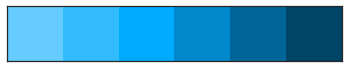

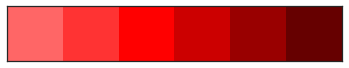

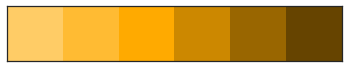

In [38]:
#Split complements to custom blues (0 and 40 degree hues)
custom_blues_split1 = ["#FF6666", "#FF3333", "#FF0000", "#CC0000", "#990000", "#660000"]
custom_blues_split2 = ["#FFCC66", "#FFBB33", "#FFAA00", "#CC8800", "#996600", "#664400"]

sns.palplot(custom_blues)
sns.palplot(custom_blues_split1)
sns.palplot(custom_blues_split2)

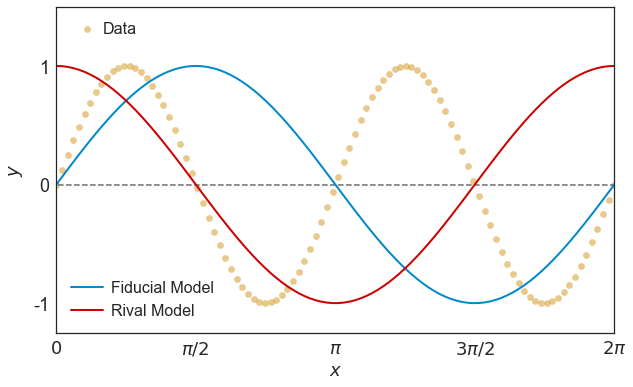

In [39]:
fig = plt.figure(figsize=(10,6))

fiducial = plt.plot(xpts, np.sin(xpts), c=custom_blues[3], linewidth=2, label='Fiducial Model')
rival = plt.plot(xpts, np.cos(xpts), c=custom_blues_split1[3], linewidth=2, label='Rival Model')
data = plt.scatter(xpts, np.sin(2*xpts), alpha=0.45, s=40, c=custom_blues_split2[3], label='Data')
plt.plot(np.linspace(-0.25,6.5,100), np.zeros(100), 'gray', linestyle='--', zorder=1)

plt.xlim(0,2*np.pi)
plt.ylim(-1.25,1.5)
plt.xticks([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi], [r'$0$',r'$\pi /2$',r'$\pi$',r'$3\pi /2$',r'$2\pi$'],fontsize=18)
plt.yticks([-1,0,1], [-1,0,1], fontsize=18)
plt.xlabel(r'$x$', fontsize=18)
plt.ylabel(r'$y$', fontsize=18, labelpad=8)
first_legend = plt.legend(handles=[fiducial[0],rival[0]], loc=3, prop={'size':16}, handletextpad=0.5, frameon=False)
plt.gca().add_artist(first_legend)
plt.legend(handles=[data], loc=2, prop={'size':16}, handletextpad=0., frameon=False)

plt.show()

If you're interested, search around for examples of double complementary colorschemes (for plots with more than three colors; though if this is the case, it's fairly likely that you have too much information on one plot), analogous colorschemes (for a monochrmatic option with a bit of contrast), and triadic colorschemes (an alternative to split complementary schemes). For fun, try to identify what types of colorschemes I've used in this notebook! :-)

### Colorblind-friendly palettes

From Seaborn's color palette page: "There is a variety of kinds of color blindness, but the most common variant leads to difficulty distinguishing reds and greens. It’s generally a good idea to avoid using red and green for plot elements that need to be discriminated based on color." There is a plethora of information online about how to choose colorblind-friendly palettes; to oversimplify, it often boils down to avoiding certain color combinations.

## Tips for Making Publication-Quality Plots <a class="anchor" id="sixth-bullet"></a>

My two cents on making publication-quality plots:

* Axes labels, tick labels, titles, etc. should be large and easy to read (at the very least larger than body text in a paper, but preferably much larger);

* Contrast multiple lines or markers by varying linewidths, colors, linestyles, marker styles, or some combination of these;

* Clearly label the elements of your plots, and describe them again in the captions, even if it seems redundant;

* Follow the colorscheme guidelines from the previous section; avoid very bright colors, and make sure that your colors are easily distinguishable;

* As in art, utilize negative space. Compare the two plots below, both of which follow the general guidelines we've outlined. Which one looks better?

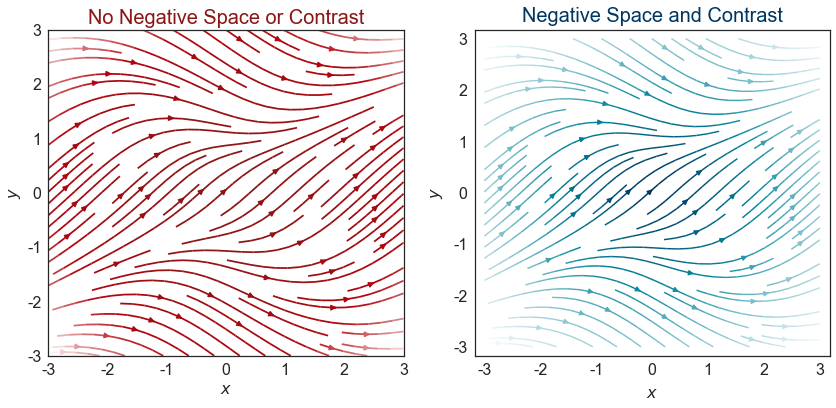

In [50]:
fig = plt.figure(figsize=(14,6))

#Make up some data
Y, X = np.mgrid[-3:3:25j, -3:3:25j]
U, V = 1 + X**2 + Y**2, 1 + X**2 - Y**2

ax1 = fig.add_subplot(121)
stream1 = ax1.streamplot(X, Y, U, V, density=1, color=U, cmap=stanford_cmap)

ax1.set_xticks([-3,-2,-1,0,1,2,3])
ax1.set_xticklabels([-3,-2,-1,0,1,2,3], fontsize=16)
ax1.set_yticks([-3,-2,-1,0,1,2,3])
ax1.set_yticklabels([-3,-2,-1,0,1,2,3], fontsize=16)
ax1.set_xlabel(r'$x$', fontsize=16)
ax1.set_ylabel(r'$y$', fontsize=16)
ax1.set_title(r'No Negative Space or Contrast', fontsize=20, color=stanford_colors[0])

ax2 = fig.add_subplot(122)
ax2.streamplot(X, Y, U, V, density=1, linewidth=1.5*U**(-0.025), color=U, cmap=ucsb_cmap, norm=colors.LogNorm(vmin=np.min(U), vmax=np.max(U)))

ax2.set_xlim(-3.175,3.175)
ax2.set_ylim(-3.175,3.175)
ax2.set_xticks([-3,-2,-1,0,1,2,3])
ax2.set_xticklabels([-3,-2,-1,0,1,2,3], fontsize=16)
ax2.set_yticks([-3,-2,-1,0,1,2,3])
ax2.set_yticklabels([-3,-2,-1,0,1,2,3], fontsize=16)
ax2.set_xlabel(r'$x$', fontsize=16, labelpad=8)
ax2.set_ylabel(r'$y$', fontsize=16, labelpad=8)
ax2.set_title(r'Negative Space and Contrast', fontsize=20, color=ucsb_colors[0], y=1.005)

plt.show()

My two cents on coherent data visualization throughout a paper. The general rule of thumb is to be as consistent as possible from plot to plot. In particular:

* Use consistent figure sizes and in-plot sizes (including ticklabel fontsize, tick size, legend fontsize, legend size, title size, etc.) whenever possible; however, particularly important figures can be large/double-column;

* Use a consistent, color-blind friendly, and visually appealing colorscheme (see previous section). For example, consider presenting your main/alternate results in the same complementary primary/secondary colors throughout a paper;

* Check the journal's preferred figure format; PDFs are usually desirable, but note that converting to PDF can change how certain aspects of your plots appear (especially transparency/alpha commands).